<a href="https://colab.research.google.com/github/Priyam8210/CyberLab/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
train_data = (pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emnist-letters-train.csv"))
test_data = (pd.read_csv("/content/drive/MyDrive/Colab Notebooks/emnist-letters-test.csv"))

In [70]:
train_data.isnull().sum()

23       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.411    0
0.412    0
0.413    0
0.414    0
0.415    0
Length: 785, dtype: int64

In [71]:
train_data.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
test_data.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
Y_label = train_data["23"]

In [76]:
print(Y_label)

0         7
1        16
2        15
3        23
4        17
         ..
88794     1
88795    21
88796     1
88797    23
88798    12
Name: 23, Length: 88799, dtype: int64


In [77]:
train_data = pd.get_dummies(train_data, columns =['23'])
test_data= pd.get_dummies(test_data,columns =['1'])


In [78]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 810 entries, 0 to 23_26
dtypes: int64(784), uint8(26)
memory usage: 533.3 MB
None


In [79]:
train_data = np.array(train_data)
test_data = np.array(test_data)
Y_train_label = np.array(Y_label)

In [36]:
X_train = train_data[:, :784]
X_test = test_data[:,:784]

Y_train = train_data[:, 784:]
Y_test = test_data[:, 784:]



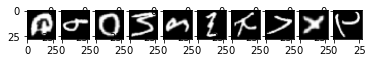

In [80]:
#showing image of first 5 example
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i, :].reshape(28,28), cmap='gray')

In [81]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)


(88799, 784)
(88799, 26)
(14799, 784)


In [82]:
m1 = np.size(X_train, 0)
n1 = np.size(X_test, 0)
print(m1)
print(n1)

88799
14799


In [83]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
m2 = np.size(X_train, 1)
W1 = np.random.randn(26, m2)
print(m2)
print(W1.shape)

784
(26, 784)


In [85]:
def sigmoid(X, W, b):
  return 1.0/(1+np.exp(-(W@(X.T)))+b)

In [86]:
def initial_params(X_train):
  m2 = np.size(X_train, 1)
  W1 = np.random.randn(26, m2)
  b1 = np.random.randn(26, 1)
  W2 = np.random.randn(26, 26)
  b2 = np.random.randn(26, 1)
  W3 = np.random.randn(26, 26)
  b3 = np.random.randn(26, 1)

  return W1, W2, W3, b1, b2, b3

In [87]:
# Foreward Propogation
def for_propogation(X_train, W1, W2, W3, b1, b2, b3):

  a1 = sigmoid(X_train, W1, b1)

  a2 = sigmoid(a1.T, W2,  b2)
  
  Y_pred = sigmoid(a2.T, W3, b3)

  return a1, a2, Y_pred





In [88]:
def back_propogation(X, Y_train, W2, W3, a1, a2, Y_pred ):
  m = np.size(X, 0)
  
  d3 = Y_pred - Y_train.T
  delta3 = (1/m)*(d3@(a2.T))
  ch_3 = (1/m)*d3.sum(axis = 0)

  d2 = ((W3.T)@d3)*(a2*(1-a2))
  delta2 = (1/m)*(d2@(a1.T))
  ch_2 = (1/m)*d2.sum(axis = 0)

  d1 = ((W2.T)@d2)*(a1*(1-a1))
  delta1 = (1/m)* (d1@(X))
  ch_1 = (1/m)*d1.sum(axis = 0)

  return delta3, ch_3, delta2, ch_2, delta1, ch_1





In [89]:
def Para_update(W1, W2, W3, b1, b2, b3 ,delta3, ch_3, delta2, ch_2, delta1, ch_1, alpha):
  W1 = W1 - alpha*delta1
  b1 = b1 - alpha*ch_1

  W2 = W2 - alpha*delta2
  b2 = b2 - alpha*ch_2

  W3 = W3 - alpha*delta3
  b3 = b3 - alpha*ch_3

  return W1, W2, W3, b1, b2, b3


In [91]:
def accuracy(Y_pred, Y):
  n = np.size(Y, 1)
  j=0
  n1 = np.size(Y_pred,axis= 1)
  n2 = np.size(Y,axis= 1)
  Y_pred = np.argmax(Y_pred,0)
  Y = np.argmax(Y, 0)
  Y_pred.shape = (n1, 1)
  Y.shape = (n2, 1)

  for i in range(n):
    if Y_pred[i] == Y[i]:
      j = j+1

  return j/n

In [92]:
def gradient_descent(X_train, Y_train, iter, alpha):
  W1, W2, W3, b1, b2, b3 = initial_params(X_train)
  m = np.size(X_train, 0)
  for i in range(iter):
    a1, a2, Y_pred = for_propogation(X_train, W1, W2, W3, b1, b2, b3)
    delta3, ch_3, delta2, ch_2, delta1, ch_1 = back_propogation(X_train, Y_train, W2, W3, a1, a2, Y_pred )
    W1, W2, W3, b1, b2, b3 = Para_update(W1, W2, W3, b1, b2, b3 ,delta3, ch_3, delta2, ch_2, delta1, ch_1, alpha)


    if i%10 == 0:
      print("after", i, "accuracy", accuracy(Y_pred, Y_train.T))

  return W1, W2, W3, b1, b2, b3








In [95]:
W1, W2, W3, b1, b2, b3 = gradient_descent(X_train, Y_train, iter = 300, alpha = .03)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


after 0 accuracy 0.040169371276703565
after 10 accuracy 0.038615299721843716
after 20 accuracy 0.02193718397729704
after 30 accuracy 0.03752294507821034
after 40 accuracy 0.03730897870471514
after 50 accuracy 0.039279721618486696
after 60 accuracy 0.03197108075541391
after 70 accuracy 0.06840167118999088
after 80 accuracy 0.04663340803387426
after 90 accuracy 0.04081127039718916
after 100 accuracy 0.05023705221905652
after 110 accuracy 0.04284958163943288
after 120 accuracy 0.04121668036802216
after 130 accuracy 0.03666707958422955
after 140 accuracy 0.03917836912577844
after 150 accuracy 0.03918963051385714
after 160 accuracy 0.03922341467809322
after 170 accuracy 0.03898692552844064
after 180 accuracy 0.03966260881316231
after 190 accuracy 0.06826653453304654
after 200 accuracy 0.10417910111600356
after 210 accuracy 0.03930224439464408
after 220 accuracy 0.04308607078908546
after 230 accuracy 0.039392335499273644
after 240 accuracy 0.040405860426356154
after 250 accuracy 0.0460027703

In [96]:
W1.shape

(26, 784)

In [97]:
X_test.shape

(14799, 784)

In [ ]:
# testing 
a, b, Y_pred_test = for_propogation(X_test, W1, W2, W3, b1, b2, b3)

